In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plotly as py
import plotly.graph_objects as go

%matplotlib inline

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2714207,5886.0,Leilighet,Andel,3,91 m²,91 m²,3,1978,NaN,NYBORG | Romslig 4-roms topp- og hjørneleiligh...,Aktiv Arna & Åsane As
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,2978814,2624,0.0,Leilighet,Eier (Selveier),2,56 m²,59 m²,3,2018,NaN,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2267281,2000.0,Leilighet,Eier (Selveier),2,66 m²,69 m²,2,2007,NaN,"Bo solrikt og skjermet i Løken sentrum, i en t...",Aktiv Bjørkelangen
3,"Hekkveien 1, 0571 Oslo",5400000,442228,19520,5861748,5506.0,Leilighet,Aksje,3,72 m²,72 m²,1,1955,G - mørkegrønn,"Lekker 4-roms m/sydvendt balkong på ca. 5,5 m²...",Aktiv Carl Berner
4,"Christian Michelsens gate 22, 0568 Oslo",4500000,177268,19520,4696788,3683.0,Leilighet,Aksje,1,56 m²,56 m²,4,1933,G - oransje,Påkostet & flott 2-roms med gjennomtenkte løsn...,Aktiv Carl Berner


In [4]:
df.shape

(709, 16)

In [5]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        0
Totalpris           0
Felleskost          0
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking     176
Beskrivelse         0
Eiendomsmegler    230
dtype: int64

In [6]:
# if the Omkostninger is higher than Prisantydning, then the Omkostninger is most likely the value of Totalpris,
# if not consider the Prisantydning as the Totalpris
df['Totalpris'] = df.apply(lambda x : x['Omkostninger'] if x['Omkostninger'] > x['Prisantydning'] else x['Prisantydning'], axis = 1)

In [7]:
df['Omkostninger'] = df.apply(lambda x : '0' if x['Omkostninger'] == x['Totalpris'] else x['Omkostninger'], axis = 1)

In [8]:
# df['Boligtype'].unique()

# drop this column, won't add any extra value for our analysis 
df.drop('Boligtype', axis = 1, inplace = True)

In [9]:
df[df['Energimerking'].isna() & df['Eiendomsmegler'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
480,"Bjørnsons gate 28 B, 5059 Bergen",890000,549927,12744,890000,4343.000000,Aksje,18 m²,18 m²,4,1933,477 m² (eiet),NaN,"Kronstad - Lekker, nyoppusset studioleilighet....",NaN
481,"Bjørkelivegen 11A, 4708 Vennesla",1995000,58312,0,2053312,835.583333,Eier (Selveier),2,63 m²,68 m²,1,2014,NaN,Vennesla/Vikeland - Flott 3-roms endeleilighet...,NaN
484,"Bevervegen 20, 4707 Vennesla",1790000,52622,0,1842622,637.500000,Eier (Selveier),2,63 m²,66 m²,3,2009,NaN,Heptekjerr | Smakfull 3-roms toppleilighet | V...,NaN
488,"Uranus vei 6B, 3226 Sandefjord",2490000,63592,0,2553592,580.916667,Eier (Selveier),2,69 m²,69 m²,1991,E - rød,NaN,Flytt rett inn i en lekker og oppgradert leili...,NaN
494,"Kristoffer Robins vei 52, 0978 Oslo",3890000,221000,8482,3890000,5059.000000,Andel,3,85 m²,93 m²,4,1968,NaN,Lekker og strøken 4-roms topp- og endeleilighe...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,"Solheimslien 44, 5056 Bergen",2290000,1219184,5060,2290000,8414.000000,Andel,3,73 m²,91 m²,3,1965,NaN,Stor 4 roms leilighet med panoramautsikt | Ny ...,NaN
684,"Presthaugvegen 3C, 5521 Haugesund",1650000,153916,5860,1650000,3703.000000,Andel,2,72 m²,72 m²,1,1969,NaN,Solvang/Presthaug - Meget tiltalende leilighet...,NaN
689,"Gymnasgata 4, 8300 Svolvær",2750000,88099,5232,2750000,0.000000,Eier (Selveier),63 m²,63 m²,1969,G - oransje,464 m² (eiet),NaN,Oppgradert 3-romsleilighet med nydelig utsikt ...,NaN
699,"Bentsebrugata 13J, 0476 Oslo",7950000,201292,0,8151292,0.000000,Eier (Selveier),3,80 m²,80 m²,4,1959,NaN,Lekker 4-roms endeleilighet fra 2021 med heis ...,NaN


In [10]:
df.drop(df[df['Energimerking'].isna() & df['Eiendomsmegler'].isna()].index, inplace = True)

In [11]:
df[df['Energimerking'].isna() & df['Eiendomsmegler'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler


In [12]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        0
Totalpris           0
Felleskost          0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking     113
Beskrivelse         0
Eiendomsmegler    167
dtype: int64

In [13]:
df[df['Energimerking'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.000000,Andel,3,91 m²,91 m²,3,1978,NaN,NYBORG | Romslig 4-roms topp- og hjørneleiligh...,Aktiv Arna & Åsane As
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,0.000000,Eier (Selveier),2,56 m²,59 m²,3,2018,NaN,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.000000,Eier (Selveier),2,66 m²,69 m²,2,2007,NaN,"Bo solrikt og skjermet i Løken sentrum, i en t...",Aktiv Bjørkelangen
7,"St. Hanshaugen 13 B, 2413 Elverum",1000000,1017797,8032,1000000,8564.000000,Andel,1,72 m²,77 m²,2006.0,C - rød,NaN,Strøken og funksjonell andelsleilighet med ege...,Aktiv Elverum
8,"Odins gate 14 A, 0266 Oslo",3750000,102589,107842,3750000,2257.000000,Eier (Selveier),1,35 m²,35 m²,1,1898,NaN,"Innbydende, klassisk og gjennomgående 2-roms. ...",Aktiv Frogner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,"Mogata 2A, 0462 Oslo",5250000,358577,16003,5250000,4133.000000,Andel,3,72 m²,72 m²,1948,G - rød,NaN,Flott 3-roms hjørneleilighet med direkte adkom...,Schala & Partners Grünerløkka
470,"Odvar Solbergs vei 200, 0973 Oslo",2450000,578882,16253,2450000,5352.000000,Andel,3,86 m²,102 m²,1973,G - rød,NaN,Romslig og lys 4-roms I Solrik balkong I Nærhe...,Schala & Partners Kalbakken
473,"Firkløverveien 7, 0377 Oslo",7890000,208792,0,8098792,0.000000,Eier (Selveier),3,152 m²,152 m²,1933,E - oransje,NaN,Innholdsrik leilighet o/2 plan på 152 m2. Muli...,Sem & Johnsen
474,"Haldenveien 94, 1367 Snarøya",24800000,631542,0,25431542,332.333333,Eier (Selveier),3,274 m²,297 m²,1,1968,NaN,"Stor, sjønær selveierleil. med fantastisk sjøu...",Sem & Johnsen


In [14]:
# seems like many Energimerking values are placed in Byggeår column, check that

# Energimerking in Norway goes from A to G, I will make a list with all these values ans check if Byggeår 
# contians any of it. I added space and - because this is how Energimerking is in the dataset

energimerking_lst = ['A -','B -','C -','D -','E -','F -','G -']

filt = (df['Byggeår'].str.contains('|'.join(energimerking_lst)))

df.loc[filt] # 39 rows with such values

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
7,"St. Hanshaugen 13 B, 2413 Elverum",1000000,1017797,8032,1000000,8564.000000,Andel,1,72 m²,77 m²,2006.0,C - rød,NaN,Strøken og funksjonell andelsleilighet med ege...,Aktiv Elverum
24,"Eventyrstien 21, 2212 Kongsvinger",1800000,313673,8032,1800000,5327.000000,Andel,3,92 m²,92 m²,1986,F - gul,NaN,Flott 4-roms leilighet med trinnfri adkomst.,Aktiv Kongsvinger
48,"Skøyenåsveien 13, 0686 Oslo",3290000,41000,15526,3290000,2414.000000,Andel,44 m²,44 m²,1,1954,G - lysegrønn,NaN,Meget pen og romslig 1 roms hjørneleilighet me...,Aktiv Østensjø/Lambertseter
56,"Ivar Aasens veg 2, 7804 Namsos",1690000,151912,5032,1690000,4150.000000,Andel,2,63 m²,67 m²,1953,G - gul,NaN,Bjørum - Andelsleilighet i horisontaldelt toma...,Boli Eiendomsmegling AS
57,"Finn Christiansens veg 11D, 7804 Namsos",850000,27500,29762,850000,500.000000,Eier (Selveier),41 m²,43 m²,2,1925,G - rød,NaN,"Namsos, 2-roms selveierleilighet i 2. etg. med...",Boli Eiendomsmegling AS
58,"Rustabakken 9, 4027 Stavanger",750000,2152500,1168,750000,4407.000000,Andel,1,59 m²,59 m²,2014,C - mørkegrønn,NaN,"Tasta / Stavanger, 2-roms andelsleilighet med ...",Codex Advokat Oslo AS
59,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5500000,3308,0,5500000,408.333333,Eier (Selveier),3,129 m²,133 m²,2018,B - rød,NaN,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
61,"Tors vei 40A, 3040 Drammen",1690000,31820,8110,1690000,1750.000000,Andel,31 m²,31 m²,3,1973,E - rød,NaN,Lys og trivelig 1-roms leilighet i Tors vei me...,Dialog Eiendomsmegling AS avd Drammen
62,"Michael Berentsens gate 4, 4014 Stavanger",3500000,96520,0,3596520,0.000000,Eier (Selveier),2,89 m²,89 m²,1919,G - rød,NaN,Attraktiv leilighet over to plan - Renovert i ...,EIE eiendomsmegling - Espen Eide & Partnere AS
75,"Holbergs gate 11b, 0166 Oslo",3490000,126000,99420,3490000,3364.000000,Eier (Selveier),1,36 m²,36 m²,1892,G - rød,NaN,BISLETT | Fresh & fin 2-roms med sentral belig...,EIE eiendomsmegling Frogner


In [15]:
# move values that contains ['A','B','C','D','E','F','G'] form Byggeår to Energimerking
df.loc[filt, 'Energimerking'] = df.loc[filt, 'Byggeår']

In [16]:
df.loc[filt, 'Byggeår'] = '0'

In [17]:
# Etasje column has many values that belongs to Byggeår and some values that belongs to Energimerking
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '2006.0', '1986', 'E - oransje', '2021',
       '3.0', '2.0', '8', '1990', '1954', '1.0', '1953', '1925', '2014',
       '2018', '1973', '1919', '10', '4.0', '1892', '6', '1935', '2016',
       '2009', '2017.0', '1948', '2003', '2005', '1965', '1978', '1982',
       '12', '12.0', '1880', '2020', '2007', '1936', '1991', '2004',
       '1987', '1937', '1933', '1969', 'G - rød', '1951', '1900', '1938',
       '5.0', '1985', '1930', '7', '9'], dtype=object)

In [18]:
filt = (df['Etasje'].str.contains('|'.join(energimerking_lst)))
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
34,"Fjordgata 1 B, 7300 Orkanger",1650000,137000,8032,1650000,3793.0,Andel,41 m²,41 m²,2002,E - oransje,Eiet,NaN,Praktisk leilighet i et lite og koselig borett...,Aktiv Orkla
407,"Thereses gate 31B, 0354 Oslo",3290000,27808,15553,3290000,1967.0,Andel,34 m²,34 m²,1901,G - rød,1,NaN,"Klassisk, moderne og tiltalende 1-roms rett ve...",PrivatMegleren Ullevål


In [19]:
# move values that contains ['A','B','C','D','E','F','G'] form Etasje to Energimerking
df.loc[filt, 'Energimerking'] = df.loc[filt, 'Etasje']

# replace these values with first floor 
df.loc[filt, 'Etasje'] = '1'

In [20]:
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '2006.0', '1986', '2021', '3.0', '2.0',
       '8', '1990', '1954', '1.0', '1953', '1925', '2014', '2018', '1973',
       '1919', '10', '4.0', '1892', '6', '1935', '2016', '2009', '2017.0',
       '1948', '2003', '2005', '1965', '1978', '1982', '12', '12.0',
       '1880', '2020', '2007', '1936', '1991', '2004', '1987', '1937',
       '1933', '1969', '1951', '1900', '1938', '5.0', '1985', '1930', '7',
       '9'], dtype=object)

In [21]:
# get all rows where Etasje contians any of these values 18,19,20
century_lst = ['18','19','20']

filt = (df['Etasje'].str.contains('|'.join(century_lst)))
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
7,"St. Hanshaugen 13 B, 2413 Elverum",1000000,1017797,8032,1000000,8564.000000,Andel,1,72 m²,77 m²,2006.0,0,C - rød,Strøken og funksjonell andelsleilighet med ege...,Aktiv Elverum
24,"Eventyrstien 21, 2212 Kongsvinger",1800000,313673,8032,1800000,5327.000000,Andel,3,92 m²,92 m²,1986,0,F - gul,Flott 4-roms leilighet med trinnfri adkomst.,Aktiv Kongsvinger
36,"Mosseveien 67, 1610 Fredrikstad",3750000,105292,0,3855292,0.000000,Eier (Selveier),1,48 m²,52 m²,2021,7293 m² (eiet),NaN,Nyoppført og moderne 2-roms selveierleilighet ...,Aktiv Sarpsborg
45,"Skåveien 2, 7290 Støren",1700000,54042,0,1754042,0.000000,Eier (Selveier),2,91 m²,2,1990,2866 m² (eiet),NaN,Praktisk 3- roms selveierleilighet i 2. etasje...,Aktiv Trondheim
48,"Skøyenåsveien 13, 0686 Oslo",3290000,41000,15526,3290000,2414.000000,Andel,44 m²,44 m²,1,1954,0,G - lysegrønn,Meget pen og romslig 1 roms hjørneleilighet me...,Aktiv Østensjø/Lambertseter
56,"Ivar Aasens veg 2, 7804 Namsos",1690000,151912,5032,1690000,4150.000000,Andel,2,63 m²,67 m²,1953,0,G - gul,Bjørum - Andelsleilighet i horisontaldelt toma...,Boli Eiendomsmegling AS
57,"Finn Christiansens veg 11D, 7804 Namsos",850000,27500,29762,850000,500.000000,Eier (Selveier),41 m²,43 m²,2,1925,0,G - rød,"Namsos, 2-roms selveierleilighet i 2. etg. med...",Boli Eiendomsmegling AS
58,"Rustabakken 9, 4027 Stavanger",750000,2152500,1168,750000,4407.000000,Andel,1,59 m²,59 m²,2014,0,C - mørkegrønn,"Tasta / Stavanger, 2-roms andelsleilighet med ...",Codex Advokat Oslo AS
59,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5500000,3308,0,5500000,408.333333,Eier (Selveier),3,129 m²,133 m²,2018,0,B - rød,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
61,"Tors vei 40A, 3040 Drammen",1690000,31820,8110,1690000,1750.000000,Andel,31 m²,31 m²,3,1973,0,E - rød,Lys og trivelig 1-roms leilighet i Tors vei me...,Dialog Eiendomsmegling AS avd Drammen


In [22]:
#swap values for these columns
df.loc[filt, ['Byggeår','Etasje']] = df.loc[filt, ['Etasje','Byggeår']].values

In [23]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
7,"St. Hanshaugen 13 B, 2413 Elverum",1000000,1017797,8032,1000000,8564.000000,Andel,1,72 m²,77 m²,0,2006.0,C - rød,Strøken og funksjonell andelsleilighet med ege...,Aktiv Elverum
24,"Eventyrstien 21, 2212 Kongsvinger",1800000,313673,8032,1800000,5327.000000,Andel,3,92 m²,92 m²,0,1986,F - gul,Flott 4-roms leilighet med trinnfri adkomst.,Aktiv Kongsvinger
36,"Mosseveien 67, 1610 Fredrikstad",3750000,105292,0,3855292,0.000000,Eier (Selveier),1,48 m²,52 m²,7293 m² (eiet),2021,NaN,Nyoppført og moderne 2-roms selveierleilighet ...,Aktiv Sarpsborg
45,"Skåveien 2, 7290 Støren",1700000,54042,0,1754042,0.000000,Eier (Selveier),2,91 m²,2,2866 m² (eiet),1990,NaN,Praktisk 3- roms selveierleilighet i 2. etasje...,Aktiv Trondheim
48,"Skøyenåsveien 13, 0686 Oslo",3290000,41000,15526,3290000,2414.000000,Andel,44 m²,44 m²,1,0,1954,G - lysegrønn,Meget pen og romslig 1 roms hjørneleilighet me...,Aktiv Østensjø/Lambertseter
56,"Ivar Aasens veg 2, 7804 Namsos",1690000,151912,5032,1690000,4150.000000,Andel,2,63 m²,67 m²,0,1953,G - gul,Bjørum - Andelsleilighet i horisontaldelt toma...,Boli Eiendomsmegling AS
57,"Finn Christiansens veg 11D, 7804 Namsos",850000,27500,29762,850000,500.000000,Eier (Selveier),41 m²,43 m²,2,0,1925,G - rød,"Namsos, 2-roms selveierleilighet i 2. etg. med...",Boli Eiendomsmegling AS
58,"Rustabakken 9, 4027 Stavanger",750000,2152500,1168,750000,4407.000000,Andel,1,59 m²,59 m²,0,2014,C - mørkegrønn,"Tasta / Stavanger, 2-roms andelsleilighet med ...",Codex Advokat Oslo AS
59,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5500000,3308,0,5500000,408.333333,Eier (Selveier),3,129 m²,133 m²,0,2018,B - rød,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
61,"Tors vei 40A, 3040 Drammen",1690000,31820,8110,1690000,1750.000000,Andel,31 m²,31 m²,3,0,1973,E - rød,Lys og trivelig 1-roms leilighet i Tors vei me...,Dialog Eiendomsmegling AS avd Drammen


In [24]:
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '0', '7293 m² (eiet)', '3.0', '2.0', '8',
       '2866 m² (eiet)', '1.0', '10', '4.0', '6', '12', '12.0', 'Eiet',
       '3091 m² (eiet)', '5.0', '7', '9'], dtype=object)

In [25]:
filt = (df['Etasje'].str.contains('eiet'))
df.loc[filt]

# I choose to drop these rows. I don't understand why values in Etasje column (which most likely belongs to Bruksareal) 
# are so high

df.drop(df.loc[filt].index, inplace = True)

In [26]:
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '0', '3.0', '2.0', '8', '1.0', '10',
       '4.0', '6', '12', '12.0', 'Eiet', '5.0', '7', '9'], dtype=object)

In [27]:
filt = df['Etasje'].str.contains('Eiet')
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
307,"Stadion 17, 1671 Kråkerøy",3400000,1594,0,3400000,601.583333,Eier (Selveier),1,41 m²,4,Eiet,2020,NaN,Ny og lekker studioleilighet med rå utsikt lan...,Møller & Partners
349,"Skiparviklia 20, leilighet B2-301, 5221 Nesttun",9100000,228842,0,9328842,0.000000,Eier (Selveier),3,107 m²,111 m²,Eiet,2021,NaN,Nydelig innholdsrik helt ny toppleilighet med ...,PROAKTIV PROSJEKTMEGLING AS


In [28]:
df.loc[307,'Etasje'] = df.loc[307,'Bruksareal']
df.loc[307,'Bruksareal'] = df.loc[307,'Primærrom']

In [29]:
df.loc[349,'Beskrivelse']

# because it says toppleilighet I chose to translate that to 5th floor

df.loc[349,'Etasje'] = '5'

In [30]:
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '0', '3.0', '2.0', '8', '1.0', '10',
       '4.0', '6', '12', '12.0', '5.0', '7', '9'], dtype=object)

In [31]:
# convert 2.0 to 2 and 3.0 to 3 etc..
df['Etasje'] = df['Etasje'].apply(lambda x: x.split('.')[0])

In [32]:
df['Etasje'].unique()

array(['3', '2', '1', '4', '5', '0', '8', '10', '6', '12', '7', '9'],
      dtype=object)

In [33]:
df['Eieform_bolig'].unique()

array(['Andel', 'Eier (Selveier)', 'Aksje'], dtype=object)

In [34]:
# replace Eier (Selveier) with only Selveier
df['Eieform_bolig'] = df['Eieform_bolig'].apply(lambda x: x.replace('Eier ', '').replace('(','').replace(')',''))

In [35]:
df['Eieform_bolig'].unique()

array(['Andel', 'Selveier', 'Aksje'], dtype=object)

In [36]:
df['Soverom'].unique()

array(['3', '2', '1', '41 m²', '44 m²', '4', '31 m²', '29 m²', '16 m²',
       '40 m²', '0', '23 m²', '37 m²', '65 m²', '5', '27 m²', '22 m²',
       '34 m²', '94 m²', '20 m²', '47 m²', '39 m²'], dtype=object)

In [37]:
# values in Soverom should be values of Primærrom or Bruksareal, normaly Bruksareal is larger than Primærrom. 
# In row 97 and 437 I see that Primærrom value is higher than value in Soverom, which means values in Soverom should 
# be moved Primærrom and values in Primærrom should be moved to Bruksareal and values in Bruksareal should be moved to Soverom

filt = (df['Soverom'].str.contains('m²'))
df.loc[filt]

df.loc[filt, ['Soverom', 'Primærrom', 'Bruksareal']] = df.loc[filt, ['Bruksareal', 'Soverom', 'Primærrom']].values


In [38]:
df['Soverom'].unique()

array(['3', '2', '1', '2002', '4', '0', '5', '1901'], dtype=object)

In [39]:
byggår_lst = ['2002', '1901']
filt = (df['Soverom'].str.contains('|'.join(byggår_lst)))
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
34,"Fjordgata 1 B, 7300 Orkanger",1650000,137000,8032,1650000,3793.0,Andel,2002,41 m²,41 m²,1,Eiet,E - oransje,Praktisk leilighet i et lite og koselig borett...,Aktiv Orkla
407,"Thereses gate 31B, 0354 Oslo",3290000,27808,15553,3290000,1967.0,Andel,1901,34 m²,34 m²,1,1,G - rød,"Klassisk, moderne og tiltalende 1-roms rett ve...",PrivatMegleren Ullevål


In [40]:
df.loc[filt, ['Soverom', 'Byggeår']] = df.loc[filt, ['Byggeår', 'Soverom']].values

In [41]:
df['Soverom'].unique()

array(['3', '2', '1', 'Eiet', '4', '0', '5'], dtype=object)

In [42]:
# the row with Soverom equals 'Eiet' is 41 m², I beleive for such size the appartment has only 1 room, i will change it to 1
df.loc[34, 'Soverom'] = '1'

In [43]:
df['Primærrom'].unique()

array(['91 m²', '56 m²', '66 m²', '72 m²', '51 m²', '50 m²', '35 m²',
       '52 m²', '61.9 m²', '29 m²', '58 m²', '43 m²', '75 m²', '60 m²',
       '67 m²', '89 m²', '63 m²', '92 m²', '49 m²', '65 m²', '48 m²',
       '69 m²', '79 m²', '34 m²', '41 m²', '90 m²', '68 m²', '45 m²',
       '57 m²', '44 m²', '80 m²', '47 m²', '99 m²', '59 m²', '129 m²',
       '39 m²', '31 m²', '62 m²', '105 m²', '76 m²', '82 m²', '74 m²',
       '64 m²', '81 m²', '54 m²', '36 m²', '135 m²', '73 m²', '83 m²',
       '77 m²', '16 m²', '95 m²', '128 m²', '78 m²', '46 m²', '70 m²',
       '106 m²', '40 m²', '55 m²', '100 m²', '71 m²', '87 m²', '84 m²',
       '53 m²', '96 m²', '88 m²', '19 m²', '112 m²', '33 m²', '98 m²',
       '109 m²', '37 m²', '118 m²', '86 m²', '94 m²', '23 m²', '97 m²',
       '85 m²', '102 m²', '127 m²', '126 m²', '38 m²', '150 m²', '30 m²',
       '125 m²', '101 m²', '27 m²', '42 m²', '61 m²', '136 m²', '32 m²',
       '103 m²', '25 m²', '107 m²', '114 m²', '124 m²', '138 m²',
      

In [44]:
# return all rows where Primærrom doesn't contians m²
df[~df['Primærrom'].str.contains('m²')]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler


In [45]:
df['Bruksareal'].unique()

array(['91 m²', '59 m²', '69 m²', '72 m²', '56 m²', '51 m²', '53 m²',
       '77 m²', '35 m²', '66 m²', '52 m²', '65.5 m²', '29 m²', '50 m²',
       '58 m²', '43 m²', '85 m²', '60 m²', '70 m²', '89 m²', '92 m²',
       '49 m²', '65 m²', '57 m²', '34 m²', '76 m²', '41 m²', '71 m²',
       '90 m²', '68 m²', '44 m²', '45 m²', '55 m²', '80 m²', '75 m²',
       '62 m²', '102 m²', '67 m²', '133 m²', '31 m²', '111 m²', '79 m²',
       '74 m²', '81 m²', '36 m²', '135 m²', '93 m²', '83 m²', '16 m²',
       '98 m²', '128 m²', '82 m²', '78 m²', '47 m²', '84 m²', '106 m²',
       '100 m²', '48 m²', '88 m²', '64 m²', '63 m²', '94 m²', '54 m²',
       '61 m²', '99 m²', '96 m²', '19 m²', '117 m²', '33 m²', '86 m²',
       '109 m²', '105 m²', '112 m²', '37 m²', '40 m²', '122 m²', '118 m²',
       '101 m²', '23 m²', '39 m²', '97 m²', '95 m²', '73 m²', '127 m²',
       '104 m²', '38 m²', '87 m²', '154 m²', '30 m²', '129 m²', '116 m²',
       '113 m²', '42 m²', '138 m²', '142 m²', '130 m²', '144 m²', '32

In [46]:
# return all rows where Bruksareal doesn't contians m²
df[~df['Bruksareal'].str.contains('m²')]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
330,"Hoffsveien 65B, 0377 Oslo",6790000,4000,179492,6790000,2405.0,Selveier,2,68 m²,2,0,2016,B - rød,"Meget attraktiv 3-r selveier fra 2016, med sto...",Nordvik Frogner


In [47]:
df.loc[330, ['Bruksareal','Etasje']] = df.loc[330, ['Primærrom','Bruksareal']].values

In [48]:
df['Byggeår'].unique()

array(['1978', '2018', '2007', '1955', '1933', '1937', '2006.0', '1898',
       '1895', '1958', '1935', '2021', '2004', '1953', '1932', '1963',
       '1957', '2005', '2010', '2013', '2001', '1986', '1900', '2017',
       '1985', '1962', '1959', '1968', '2002', '1894', '2003', '1989',
       '1918', '1972', '1954', '2006', '1992', '1981', '1923', '1925',
       '2014', '1969', '1973', '1919', '2019', '2011', '2020', '1974',
       '1970', '1892', '2012', '2008', '1961', '2009', '1976', '1971',
       '2016', '1936', '1977', '1966', '1988', '1938', '1950', '1998',
       '2017.0', '1965', '1939', '1995', '1980', '2', '1964', '1999',
       '1990', '1979', '1896', '1997', '1975', '2015', '1948', '1902',
       '1917', '1960', '1906', '1949', '1947', '1982', '1903', '1991',
       '1983', '1920', '1952', '1890', '1921', '1878', '1875', '1956',
       '1880', '1911', '1912', '1967', '1940', '1994', '1927', '1886',
       '1891', '1984', '1916', '1987', '1904', '1929', '1897', '3',
       '

In [49]:
df['Byggeår'] = df['Byggeår'].apply(lambda x : x.split('.')[0])

In [50]:
# check for values that are not dates (have length less than 4)

filt = (df['Byggeår'].str.len() < 4)

df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
132,"Kongens gate 15A, leil 401, 4610 Kristiansand S",3590000,90920,0,3680920,0.0,Selveier,1,53 m²,61 m²,4,2,NaN,St. Josephs | Stor 2-roms selveierleilighet | ...,EiendomsMegler 1 Kristiansand
302,"Frostaveien 3 - B02-03, 7068 Trondheim",1156000,1734000,24460,1156000,3355.0,Andel,1,32 m²,32 m²,2,2,NaN,Sørvendt 2-roms leilighet i 2.etg ut mot rolig...,Meglerhuset Nylander avd Nybygg
397,Salg av kontraktsposisjon - L209 - Bleikerveie...,5990000,101361,0,6091361,0.0,Selveier,2,71 m²,74 m²,2,3,NaN,Leilighet på Nedre Bleiker gård | Flott hjørne...,PrivatMegleren Solli & Partnere


In [51]:
# drop these rows, because they doen't have the Byggeår anywhere 
df.drop(df.loc[filt].index, inplace = True)

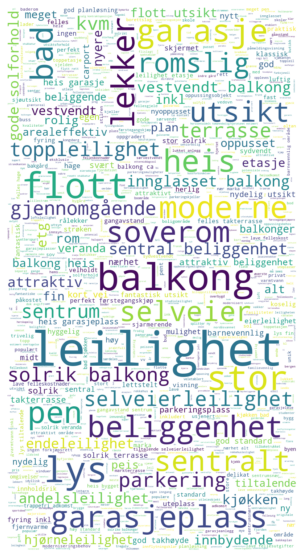

In [52]:
# extract usuful features from Beskrivelse

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


words = " ".join(df['Beskrivelse'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('norwegian'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
# from the plot above I choose to create features for 'balkong', 'utsikt', 'garasje', 
# 'heis','parkering','sentrum','toppleilighet'

In [54]:
df['balkong'] = df['Beskrivelse'].apply(lambda x: 1 if 'balkong' in x.lower() else 0)

In [55]:
df['balkong'].value_counts()

0    363
1    277
Name: balkong, dtype: int64

In [56]:
df['utsikt'] = df['Beskrivelse'].apply(lambda x: 1 if 'utsikt' in x.lower() else 0)

In [57]:
# Both rows that contains 'garasje' or 'garasjeplass' will be included here

df['garasje'] = df['Beskrivelse'].apply(lambda x: 1 if 'garasje' in x.lower() else 0)

In [58]:
df['heis'] = df['Beskrivelse'].apply(lambda x: 1 if 'heis' in x.lower() else 0)

In [59]:
df['parkering'] = df['Beskrivelse'].apply(lambda x: 1 if 'parkering' in x.lower() else 0)

In [60]:
# Both rows that contains 'sentrum' or 'sentralt' will be included here

df['sentrum'] = df['Beskrivelse'].apply(lambda x: 1 if any(s in x.lower() for s in ('sentrum', 'sentralt')) else 0)

In [61]:
df['toppleilighet'] = df['Beskrivelse'].apply(lambda x: 1 if 'toppleilighet' in x.lower() else 0)

In [62]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,Energimerking,Beskrivelse,Eiendomsmegler,balkong,utsikt,garasje,heis,parkering,sentrum,toppleilighet
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.0,Andel,3,91 m²,91 m²,...,NaN,NYBORG | Romslig 4-roms topp- og hjørneleiligh...,Aktiv Arna & Åsane As,0,0,1,0,0,0,0
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,0.0,Selveier,2,56 m²,59 m²,...,NaN,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim,0,0,1,1,0,0,0
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.0,Selveier,2,66 m²,69 m²,...,NaN,"Bo solrikt og skjermet i Løken sentrum, i en t...",Aktiv Bjørkelangen,1,0,1,0,0,1,0
3,"Hekkveien 1, 0571 Oslo",5400000,442228,19520,5400000,5506.0,Aksje,3,72 m²,72 m²,...,G - mørkegrønn,"Lekker 4-roms m/sydvendt balkong på ca. 5,5 m²...",Aktiv Carl Berner,1,0,1,0,1,0,0
4,"Christian Michelsens gate 22, 0568 Oslo",4500000,177268,19520,4500000,3683.0,Aksje,1,56 m²,56 m²,...,G - oransje,Påkostet & flott 2-roms med gjennomtenkte løsn...,Aktiv Carl Berner,1,0,0,0,0,0,0


In [63]:
# dealing with the address
df['By'] = df['Address'].apply(lambda x: x.split(' ')[-1])

In [64]:
df['By'].value_counts()
df['By'].unique()

array(['Nyborg', 'Spydeberg', 'Løken', 'Oslo', 'Tønsberg', 'Elverum',
       'Lillestrøm', 'Halden', 'Hamar', 'Ottestad', 'Eidsvoll', 'Hvam',
       'Kongsberg', 'Kongsvinger', 'Bergen', 'Kolltveit', 'Larvik',
       'Lørenskog', 'Narvik', 'Orkanger', 'Dal', 'Østerås', 'Stavanger',
       'Sandnes', 'Lundegrend', 'Rasta', 'Ålesund', 'Sykkylven', 'Skien',
       'Namsos', 'Lier', 'Drammen', 'Asker', 'Heggedal', 'Nesttun',
       'Fyllingsdalen', 'Florvåg', 'Loddefjord', 'Rykkinn', 'Furnes',
       'Blystadlia', 'Skjetten', 'Sandefjord', 'Langhus', 'Stokke',
       'Tomasjord', 'Tromsø', 'Trondheim', 'Moelv', 'Hønefoss', 'Trysil',
       'Vormsund', 'Tranby', 'Askim', 'Laksevåg', 'Vestfold', 'Egersund',
       'Sandsli', 'Gol', 'Fredrikstad', 'Horten', 'Borre', 'Hundvåg',
       'Undheim', 'Kleppe', 'Tårnåsen', 'Lillehammer', 'Fetsund',
       'Løvenstad', 'Hagan', 'Mandal', 'Moss', 'Hokksund', 'Randaberg',
       'Greåker', 'Tomter', 'Vestby', 'Brekstad', 'Hitra', 'N',
       'Sjetnemar

In [65]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,Beskrivelse,Eiendomsmegler,balkong,utsikt,garasje,heis,parkering,sentrum,toppleilighet,By
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.0,Andel,3,91 m²,91 m²,...,NYBORG | Romslig 4-roms topp- og hjørneleiligh...,Aktiv Arna & Åsane As,0,0,1,0,0,0,0,Nyborg
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,0.0,Selveier,2,56 m²,59 m²,...,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim,0,0,1,1,0,0,0,Spydeberg
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.0,Selveier,2,66 m²,69 m²,...,"Bo solrikt og skjermet i Løken sentrum, i en t...",Aktiv Bjørkelangen,1,0,1,0,0,1,0,Løken
3,"Hekkveien 1, 0571 Oslo",5400000,442228,19520,5400000,5506.0,Aksje,3,72 m²,72 m²,...,"Lekker 4-roms m/sydvendt balkong på ca. 5,5 m²...",Aktiv Carl Berner,1,0,1,0,1,0,0,Oslo
4,"Christian Michelsens gate 22, 0568 Oslo",4500000,177268,19520,4500000,3683.0,Aksje,1,56 m²,56 m²,...,Påkostet & flott 2-roms med gjennomtenkte løsn...,Aktiv Carl Berner,1,0,0,0,0,0,0,Oslo


In [66]:
df[(df['Fellesgjeld'] > 0) & (df['Felleskost'] == 0)]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,Beskrivelse,Eiendomsmegler,balkong,utsikt,garasje,heis,parkering,sentrum,toppleilighet,By
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,0.0,Selveier,2,56 m²,59 m²,...,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim,0,0,1,1,0,0,0,Spydeberg
12,"Sørlihagen, 0651 Oslo",5950000,1132,0,5951132,0.0,Andel,2,61.9 m²,65.5 m²,...,Splitter ny 3-roms med balkong. Beliggenhet i ...,Aktiv Grønland/Bjørvika,1,0,0,0,0,0,0,Oslo
19,"Bruvegen 5A, 2312 Ottestad",2750000,8032,0,2758032,0.0,Andel,2,67 m²,70 m²,...,Pen 3-roms leilighet i 4.mannsbolig i Sandvika...,Aktiv Hamar,0,1,1,0,0,0,0,Ottestad
28,"Kjerulfs gate 37D, 2000 Lillestrøm",3790000,106292,0,3896292,0.0,Selveier,2,69 m²,69 m²,...,"Gjennomgående, luftig og dels oppgradert 3-rom...",Aktiv Lillestrøm,1,0,0,0,0,0,0,Lillestrøm
41,"Luftå 27, H0304, 4322 Sandnes",2590000,76292,0,2666292,0.0,Selveier,2,65 m²,69 m²,...,Ganddal - Lys og lekker selveierleilighet - 2 ...,Aktiv Stavanger,0,0,1,0,1,0,0,Sandnes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,"Tunveien 24 (leil. B601), 1820 Spydeberg",6390000,34065,0,6424065,0.0,Selveier,2,109 m²,114 m²,...,Spydeberg // Ny toppleilighet på hele 114 kvm ...,NaN,0,0,1,1,0,0,1,Spydeberg
695,"Sørengkaia 39, 0194 Oslo",12900000,323842,0,13223842,0.0,Selveier,3,120 m²,124 m²,...,Lys 4-roms med skjermet beliggenhet & sjøutsik...,NaN,1,1,1,1,0,0,0,Oslo
696,"Gjerdrumsgata 24, 2000 Lillestrøm",3890000,98592,0,3988592,0.0,Selveier,1,46 m²,46 m²,...,Attraktiv 2-roms fra 2017 i Lillestrøm med god...,NaN,1,0,0,1,0,0,0,Lillestrøm
697,"Slettheiveien 66, 4626 Kristiansand S",1690000,317840,0,2007840,0.0,Andel,3,87 m²,104 m²,...,Stor innbydende 4-roms leilighet med stor inng...,NaN,1,0,0,0,1,0,0,S


In [67]:
# to Calculate the Felleskost value for the rows that has Fellesgjeld but not Felleskost
# let's say the Fellesgjeld should be paid in 20 years, so i will take the value of Fellesgjeld and divid it by 20 and then 
# divide it by 12 (12 month) and asign the value to Felleskost

filt = (df['Fellesgjeld'] > 0) & (df['Felleskost'] == 0)
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,Beskrivelse,Eiendomsmegler,balkong,utsikt,garasje,heis,parkering,sentrum,toppleilighet,By
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,0.0,Selveier,2,56 m²,59 m²,...,Pen og moderne leilighet med 2 soverom beligge...,Aktiv Askim,0,0,1,1,0,0,0,Spydeberg
12,"Sørlihagen, 0651 Oslo",5950000,1132,0,5951132,0.0,Andel,2,61.9 m²,65.5 m²,...,Splitter ny 3-roms med balkong. Beliggenhet i ...,Aktiv Grønland/Bjørvika,1,0,0,0,0,0,0,Oslo
19,"Bruvegen 5A, 2312 Ottestad",2750000,8032,0,2758032,0.0,Andel,2,67 m²,70 m²,...,Pen 3-roms leilighet i 4.mannsbolig i Sandvika...,Aktiv Hamar,0,1,1,0,0,0,0,Ottestad
28,"Kjerulfs gate 37D, 2000 Lillestrøm",3790000,106292,0,3896292,0.0,Selveier,2,69 m²,69 m²,...,"Gjennomgående, luftig og dels oppgradert 3-rom...",Aktiv Lillestrøm,1,0,0,0,0,0,0,Lillestrøm
41,"Luftå 27, H0304, 4322 Sandnes",2590000,76292,0,2666292,0.0,Selveier,2,65 m²,69 m²,...,Ganddal - Lys og lekker selveierleilighet - 2 ...,Aktiv Stavanger,0,0,1,0,1,0,0,Sandnes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,"Tunveien 24 (leil. B601), 1820 Spydeberg",6390000,34065,0,6424065,0.0,Selveier,2,109 m²,114 m²,...,Spydeberg // Ny toppleilighet på hele 114 kvm ...,NaN,0,0,1,1,0,0,1,Spydeberg
695,"Sørengkaia 39, 0194 Oslo",12900000,323842,0,13223842,0.0,Selveier,3,120 m²,124 m²,...,Lys 4-roms med skjermet beliggenhet & sjøutsik...,NaN,1,1,1,1,0,0,0,Oslo
696,"Gjerdrumsgata 24, 2000 Lillestrøm",3890000,98592,0,3988592,0.0,Selveier,1,46 m²,46 m²,...,Attraktiv 2-roms fra 2017 i Lillestrøm med god...,NaN,1,0,0,1,0,0,0,Lillestrøm
697,"Slettheiveien 66, 4626 Kristiansand S",1690000,317840,0,2007840,0.0,Andel,3,87 m²,104 m²,...,Stor innbydende 4-roms leilighet med stor inng...,NaN,1,0,0,0,1,0,0,S


In [68]:
df.loc[filt, 'Felleskost'] = df.loc[filt, 'Fellesgjeld'].apply(lambda x: (x/20)/12)

In [69]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Eieform_bolig', 'Soverom', 'Primærrom', 'Bruksareal',
       'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse', 'Eiendomsmegler',
       'balkong', 'utsikt', 'garasje', 'heis', 'parkering', 'sentrum',
       'toppleilighet', 'By'],
      dtype='object')

In [70]:
# calculate the age of appartment

df['Alder'] = df['Byggeår'].apply(lambda x: 2021 - int(x))

In [71]:
df['Primærrom'] = df['Primærrom'].apply(lambda x: x.replace(' ','').replace('m²',''))
df['Bruksareal'] = df['Bruksareal'].apply(lambda x: x.replace(' ','').replace('m²',''))

In [72]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,Eiendomsmegler,balkong,utsikt,garasje,heis,parkering,sentrum,toppleilighet,By,Alder
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.000000,Andel,3,91,91,...,Aktiv Arna & Åsane As,0,0,1,0,0,0,0,Nyborg,43
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,370.058333,Selveier,2,56,59,...,Aktiv Askim,0,0,1,1,0,0,0,Spydeberg,3
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.000000,Selveier,2,66,69,...,Aktiv Bjørkelangen,1,0,1,0,0,1,0,Løken,14
3,"Hekkveien 1, 0571 Oslo",5400000,442228,19520,5400000,5506.000000,Aksje,3,72,72,...,Aktiv Carl Berner,1,0,1,0,1,0,0,Oslo,66
4,"Christian Michelsens gate 22, 0568 Oslo",4500000,177268,19520,4500000,3683.000000,Aksje,1,56,56,...,Aktiv Carl Berner,1,0,0,0,0,0,0,Oslo,88


In [73]:
# 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris', 'Felleskost' form Categorical to Numrical

df[['Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris', 'Felleskost','Primærrom','Bruksareal','Etasje','Soverom']] = df[['Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris', 'Felleskost','Primærrom','Bruksareal','Etasje','Soverom']].apply(pd.to_numeric)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 708
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         640 non-null    object 
 1   Prisantydning   640 non-null    int64  
 2   Fellesgjeld     640 non-null    int64  
 3   Omkostninger    640 non-null    int64  
 4   Totalpris       640 non-null    int64  
 5   Felleskost      640 non-null    float64
 6   Eieform_bolig   640 non-null    object 
 7   Soverom         640 non-null    int64  
 8   Primærrom       640 non-null    float64
 9   Bruksareal      640 non-null    float64
 10  Etasje          640 non-null    int64  
 11  Byggeår         640 non-null    object 
 12  Energimerking   571 non-null    object 
 13  Beskrivelse     640 non-null    object 
 14  Eiendomsmegler  473 non-null    object 
 15  balkong         640 non-null    int64  
 16  utsikt          640 non-null    int64  
 17  garasje         640 non-null    int

In [75]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Eieform_bolig', 'Soverom', 'Primærrom', 'Bruksareal',
       'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse', 'Eiendomsmegler',
       'balkong', 'utsikt', 'garasje', 'heis', 'parkering', 'sentrum',
       'toppleilighet', 'By', 'Alder'],
      dtype='object')

### dealing with missing Eiendomsmegler

In [76]:
# I can't drop the rows with missing Eiendomsmegler, because this will lead to losing a big portion of the dataset
# I can't either fill it with whatever value
# I chose to treat it as if it was a real value

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
new_cat = SimpleImputer(strategy = 'constant')

In [79]:
df['Eiendomsmegler'] = new_cat.fit_transform(df[['Eiendomsmegler']])

In [80]:
df['Eiendomsmegler'].isna().sum()

0

In [81]:
df['Eiendomsmegler'].value_counts()

missing_value                            167
Propr.no                                   8
PrivatMegleren Panorama                    7
PrivatMegleren Park                        6
EiendomsMegler 1 Skien                     6
                                        ... 
Verdi Eiendomsmegling AS                   1
PrivatMegleren Rodeløkka                   1
PrivatMegleren Primera                     1
EiendomsMegler 1 avd. Molde                1
Heimdal Eiendomsmegling AS avd Melhus      1
Name: Eiendomsmegler, Length: 262, dtype: int64

In [82]:
df['Eiendomsmegler'].unique()

array(['Aktiv Arna & Åsane As', 'Aktiv Askim', 'Aktiv Bjørkelangen',
       'Aktiv Carl Berner', 'Aktiv Eiendomsmegling Tønsberg og Re',
       'Aktiv Elverum', 'Aktiv Frogner', 'Aktiv Grønland/Bjørvika',
       'Aktiv Grünerløkka', 'Aktiv Halden', 'Aktiv Hamar',
       'Aktiv Jessheim', 'Aktiv Kløfta', 'Aktiv Kongsberg',
       'Aktiv Kongsvinger', 'Aktiv Laguneparken', 'Aktiv Larvik',
       'Aktiv Lillestrøm', 'Aktiv Lørenskog', 'Aktiv Narvik',
       'Aktiv Orkla', 'Aktiv Råholt', 'Aktiv St.Hanshaugen/Bislett',
       'Aktiv Stavanger', 'Aktiv Sunnhordland AS', 'Aktiv Torshov',
       'Aktiv Ålesund', 'Aktiv Østensjø/Lambertseter',
       'Aursnes & Partners Eiendomsmegling',
       'Aursnes & Partners Eiendomsmegling Ålesund AS',
       'BEST EIENDOMSMEGLER AS', 'BOA Eiendomsmegling Oslo Vest AS',
       'Bakke Sørvik & Partners', 'Boa Eiendomsmegling Oslo Øst',
       'Boli Eiendomsmegling AS', 'Codex Advokat Oslo AS',
       'Dialog Eiendomsmegling AS avd Drammen',
       'EIE e

In [83]:
def Eiendomsmegler_simplifier(em):
    if 'Aktiv' in em:
        return 'Aktive'
    elif 'EIE' in em:
        return 'EIE Eiendomsmegling'
    elif 'EiendomsMegler 1' in em or 'Eiendomsmegler 1' in em:
        return 'EiendomsMegler 1'
    elif 'Heimdal Eiendomsmeglin' in em:
        return 'Heimdal Eiendomsmeglin'
    elif 'Kaland & Partners' in em:
        return 'Kaland & Partners'
    elif 'Krogsveen' in em:
        return 'Krogsveen'
    elif 'Meglerhuset & Partner' in em:
        return 'Meglerhuset & Partner'    
    elif 'Meglerhuset Nylander' in em:
        return 'Meglerhuset Nylander'
    elif 'Nordvik' in em:
        return 'Nordvik'
    elif 'PrivatMegleren' in em or 'Privatmegleren' in em:
        return 'PrivatMegleren'
    elif 'Proaktiv' in em:
        return 'Proaktiv'
    elif 'Schala & Partners' in em:
        return 'Schala & Partners'
    elif 'GARANTI' in em or 'Garanti' in em:
        return 'GARANTI Eiendomsmegling'
    elif 'Aursnes & Partners' in em:
        return 'Aursnes & Partners'
    elif 'BOA Eiendomsmegling' in em or 'Boa Eiendomsmegling' in em:
        return 'BOA Eiendomsmegling'
    else:
        return em

In [84]:
df['simp_megler'] = df['Eiendomsmegler'].apply(Eiendomsmegler_simplifier)

In [85]:
#del df['simp_megler']
df['simp_megler'].unique()

array(['Aktive', 'Aursnes & Partners', 'EIE Eiendomsmegling',
       'BOA Eiendomsmegling', 'Bakke Sørvik & Partners',
       'Boli Eiendomsmegling AS', 'Codex Advokat Oslo AS',
       'Dialog Eiendomsmegling AS avd Drammen', 'EiendomsMegler 1',
       'GARANTI Eiendomsmegling', 'GRIMSØEN & PARTNERS AS',
       'Grahl-Madsen & Co Advokatfirma AS', 'Heimdal Eiendomsmeglin',
       'Huus & Partners', 'Kaland & Partners', 'Krogsveen',
       'Laastad Stavenes Advokatfellesskap', 'Leinæs & Partners',
       'Meglerhuset & Partner', 'Meglerhuset Nylander',
       'Meglerhuset Rele Haugesund AS', 'Møller & Partners',
       'Møremegling', 'Nbbo Eiendomsmegling', 'Nordic Bolig Bergen',
       'Nordvik', 'Notar Oslo', 'PROAKTIV PROSJEKTMEGLING AS',
       'PrivatMegleren', 'Proaktiv', 'Propr.no',
       'Rede Eiendomsmegling AS', 'Samsolgt by DNB Eiendom',
       'Schala & Partners', 'Sem & Johnsen',
       'Storheia Eiendomsmegling AS', 'Verdi Eiendomsmegling AS',
       'Verdi Eiendomsmeglin

<AxesSubplot:>

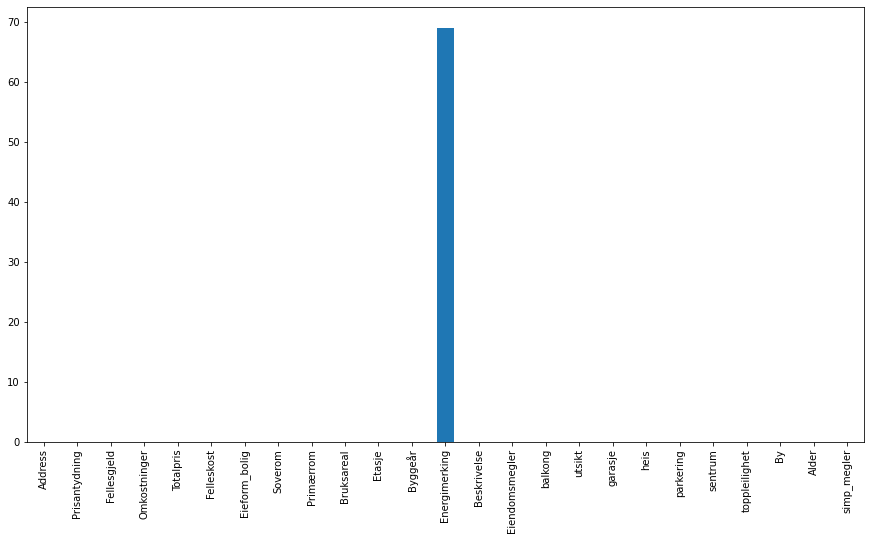

In [86]:
df.isna().sum().plot(kind = 'bar', figsize = (15,8))

### dealing with missing Energimerking

In [87]:
# I can drop the rows with missing Energimerking, but i don't have a large dataset so this is not a good practice
# I could fill the missing values with the "mode" which is the most frequently occurring value. 
# --> in Energimerking the mode is 'G - rød', but this can lead to unbalanced data 
# build a model to predict the missing Energimerking

In [88]:
# the order here matters, means that 'A' is the best Energimerking is the less best
df['Energimerking'].value_counts().index.sort_values( ascending = False)

Index(['G - rød', 'G - oransje', 'G - mørkegrønn', 'G - lysegrønn', 'G - gul',
       'F - rød', 'F - oransje', 'F - mørkegrønn', 'F - lysegrønn', 'F - gul',
       'E - rød', 'E - oransje', 'E - mørkegrønn', 'E - lysegrønn', 'E - gul',
       'D - rød', 'D - oransje', 'D - mørkegrønn', 'D - lysegrønn', 'D - gul',
       'C - rød', 'C - oransje', 'C - mørkegrønn', 'C - lysegrønn', 'C - gul',
       'C', 'B - rød', 'B - oransje', 'B - mørkegrønn', 'B - lysegrønn',
       'B - gul', 'A - oransje', 'A - mørkegrønn', 'A'],
      dtype='object')

In [89]:
# since the order matters I will use Ordinal Encoding for converting these values into numerical values
Energimerking_enco = { 'G - rød':1, 'G - oransje':2, 'G - mørkegrønn':3, 'G - lysegrønn':4, 'G - gul':5,
       'F - rød':6, 'F - oransje':7, 'F - mørkegrønn':8, 'F - lysegrønn':9, 'F - gul':10,
       'E - rød':10, 'E - oransje':11, 'E - mørkegrønn':12, 'E - lysegrønn':13, 'E - gul':14,
       'D - rød':15, 'D - oransje':16, 'D - mørkegrønn':17, 'D - lysegrønn':18, 'D - gul':19,
       'C - rød':20, 'C - oransje':21, 'C - mørkegrønn':22, 'C - lysegrønn':23, 'C - gul':24,
       'C':25, 'B - rød':26, 'B - oransje':27, 'B - mørkegrønn':28, 'B - lysegrønn':29,
       'B - gul':30, 'A - oransje':31, 'A - mørkegrønn':32, 'A':33 } 

In [90]:
#from sklearn.preprocessing import OrdinalEncoder

In [91]:
#ordi_enco = OrdinalEncoder(categories = [Energinmering_des_order])

In [92]:
#filt = (~df['Energimerking'].isna())
#ordi_enco.fit(df.loc[filt,['Energimerking']])

In [93]:
#pd.Series(ordi_enco.transform(df.loc[filt,['Energimerking']])[:,0])

In [94]:
df['Energimerking_encoded'] = df['Energimerking'].apply(lambda x: np.nan if pd.isnull(x) else Energimerking_enco[x])

In [95]:
df['Energimerking_encoded']

0       NaN
1       NaN
2       NaN
3       3.0
4       2.0
       ... 
704    17.0
705    15.0
706     1.0
707    16.0
708    15.0
Name: Energimerking_encoded, Length: 640, dtype: float64

In [96]:
df['Eieform_bolig'].unique()

array(['Andel', 'Selveier', 'Aksje'], dtype=object)

In [97]:
df = pd.concat([df, pd.get_dummies(df['Eieform_bolig'])], axis = 1)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 708
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                640 non-null    object 
 1   Prisantydning          640 non-null    int64  
 2   Fellesgjeld            640 non-null    int64  
 3   Omkostninger           640 non-null    int64  
 4   Totalpris              640 non-null    int64  
 5   Felleskost             640 non-null    float64
 6   Eieform_bolig          640 non-null    object 
 7   Soverom                640 non-null    int64  
 8   Primærrom              640 non-null    float64
 9   Bruksareal             640 non-null    float64
 10  Etasje                 640 non-null    int64  
 11  Byggeår                640 non-null    object 
 12  Energimerking          571 non-null    object 
 13  Beskrivelse            640 non-null    object 
 14  Eiendomsmegler         640 non-null    object 
 15  balkon

In [99]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Eieform_bolig', 'Soverom', 'Primærrom', 'Bruksareal',
       'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse', 'Eiendomsmegler',
       'balkong', 'utsikt', 'garasje', 'heis', 'parkering', 'sentrum',
       'toppleilighet', 'By', 'Alder', 'simp_megler', 'Energimerking_encoded',
       'Aksje', 'Andel', 'Selveier'],
      dtype='object')

In [100]:
df['Energimerking_encoded']

0       NaN
1       NaN
2       NaN
3       3.0
4       2.0
       ... 
704    17.0
705    15.0
706     1.0
707    16.0
708    15.0
Name: Energimerking_encoded, Length: 640, dtype: float64

In [101]:
# predict the missing values in the Energimerking using KNN imputer

from sklearn.impute import KNNImputer

imput_knn = KNNImputer()
imputed__ =imput_knn.fit_transform(df.drop(columns = ['Address','Eieform_bolig','Byggeår','Energimerking','Beskrivelse', 'Eiendomsmegler','By','simp_megler' ]))
len(imputed__[:,-4])


640

In [102]:
s = pd.Series(imputed__[:,-4], index=df.index, name='encoded_energimerking_noNaN')

In [103]:
df = pd.concat([df, s], axis = 1)

In [104]:
df.shape

(640, 30)

In [105]:
# filling the the missing Energimerking in the column Energimerking_encoded with the predicted values in encoded_energimerking_noNaN

filt = (df['Energimerking_encoded'].isna())
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,sentrum,toppleilighet,By,Alder,simp_megler,Energimerking_encoded,Aksje,Andel,Selveier,encoded_energimerking_noNaN
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.000000,Andel,3,91.0,91.0,...,0,0,Nyborg,43,Aktive,NaN,0,1,0,6.8
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,370.058333,Selveier,2,56.0,59.0,...,0,0,Spydeberg,3,Aktive,NaN,0,0,1,16.2
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.000000,Selveier,2,66.0,69.0,...,1,0,Løken,14,Aktive,NaN,0,0,1,11.0
8,"Odins gate 14 A, 0266 Oslo",3750000,102589,107842,3750000,2257.000000,Selveier,1,35.0,35.0,...,0,0,Oslo,123,Aktive,NaN,0,0,1,12.6
12,"Sørlihagen, 0651 Oslo",5950000,1132,0,5951132,4.716667,Andel,2,61.9,65.5,...,0,0,Oslo,0,Aktive,NaN,0,1,0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,"Nattfiolen 17, 3086 Holmestrand",3590000,25000,99112,3590000,2368.000000,Selveier,4,108.0,113.0,...,0,0,Holmestrand,5,Propr.no,NaN,0,0,1,13.4
450,"Gartnersvingen 8B, 2032 Maura",2550000,72492,0,2622492,302.050000,Selveier,2,50.0,50.0,...,0,0,Maura,1,Propr.no,NaN,0,0,1,5.2
451,"Nerviksdalen 11, 7300 Orkanger",1890000,55992,0,1945992,804.416667,Selveier,2,95.0,153.0,...,0,0,Orkanger,113,Propr.no,NaN,0,0,1,12.0
452,"Søster Mathildes gate 42, 1473 Lørenskog",3290000,90992,0,3380992,379.133333,Selveier,1,43.0,44.0,...,1,0,Lørenskog,0,Propr.no,NaN,0,0,1,20.2


In [106]:
# knn imputer can predict decimal values, because it looks into the 5 nearest neighbours and calculate the mean of the 
# Energimerking values for these rows and assign it to the missing values, thats way I round the values, to get a whole number 
#
df.loc[filt,'Energimerking_encoded'] = round(df.loc[filt,'encoded_energimerking_noNaN'])

In [109]:
df['Energimerking_encoded'].unique()

array([ 7., 16., 11.,  3.,  2., 10., 20., 13.,  6.,  8.,  1.,  9., 15.,
       17.,  4., 21., 14., 12., 22.,  5., 19., 26., 28., 29., 27., 18.,
       24., 32., 30., 23., 33., 31., 25.])

In [111]:
# now fill missing values in Energimerking

def get_key(x):
    for key, value in Energimerking_enco.items():
        if value == x:
            return key

df.loc[filt,'Energimerking'] = df.loc[filt, 'Energimerking_encoded'].apply(get_key)

In [113]:
df['Energimerking'].isna().sum()

0

In [114]:
del df['encoded_energimerking_noNaN']

In [115]:
df.isna().sum()

Address                  0
Prisantydning            0
Fellesgjeld              0
Omkostninger             0
Totalpris                0
Felleskost               0
Eieform_bolig            0
Soverom                  0
Primærrom                0
Bruksareal               0
Etasje                   0
Byggeår                  0
Energimerking            0
Beskrivelse              0
Eiendomsmegler           0
balkong                  0
utsikt                   0
garasje                  0
heis                     0
parkering                0
sentrum                  0
toppleilighet            0
By                       0
Alder                    0
simp_megler              0
Energimerking_encoded    0
Aksje                    0
Andel                    0
Selveier                 0
dtype: int64

In [116]:
df.to_csv('data_cleaned1.csv', index = False)

In [117]:
data_inn_df = pd.read_csv('data_cleaned1.csv')
data_inn_df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Eieform_bolig,Soverom,Primærrom,Bruksareal,...,parkering,sentrum,toppleilighet,By,Alder,simp_megler,Energimerking_encoded,Aksje,Andel,Selveier
0,"Liakroken 14, 5132 Nyborg",2590000,108831,15376,2590000,5886.000000,Andel,3,91.0,91.0,...,0,0,0,Nyborg,43,Aktive,7.0,0,1,0
1,"Roselundveien 67A, 1820 Spydeberg",2890000,88814,0,2978814,370.058333,Selveier,2,56.0,59.0,...,0,0,0,Spydeberg,3,Aktive,16.0,0,0,1
2,"Korporal Nerdrums vei 3 F, 1960 Løken",2200000,739,66542,2200000,2000.000000,Selveier,2,66.0,69.0,...,0,1,0,Løken,14,Aktive,11.0,0,0,1
3,"Hekkveien 1, 0571 Oslo",5400000,442228,19520,5400000,5506.000000,Aksje,3,72.0,72.0,...,1,0,0,Oslo,66,Aktive,3.0,1,0,0
4,"Christian Michelsens gate 22, 0568 Oslo",4500000,177268,19520,4500000,3683.000000,Aksje,1,56.0,56.0,...,0,0,0,Oslo,88,Aktive,2.0,1,0,0


In [ ]:
#df['Energimerking_simpl'] = df['Energimerking'].apply(lambda x: np.nan if pd.isnull(x) else Energimerking_simp(x))

In [ ]:
#plt.rcParams["figure.figsize"] = (12, 7)
#df['Energimerking'].value_counts().plot.bar()